In [1]:
# make figure

In [1]:
import pandas as pd
import os
import re
import numpy as np
from Bio.Seq import Seq
from Bio import SeqIO
import matplotlib.pyplot as plt

In [3]:
input_file = 'output/blastn_pangenome-to-16strainORFs_top-hits.csv'
df = pd.read_csv(input_file)

cols = [
'MSY24',
'MSY25',
'MSY26',
'MSY27',
'MSY28',
'MSY29',
'MSY30',
'MSY31',
'MSY32',
'MSY33',
'MSY34',
'MSY35',
'MSY36',
'MSY37',
'MSY38',
'MSY39'
]

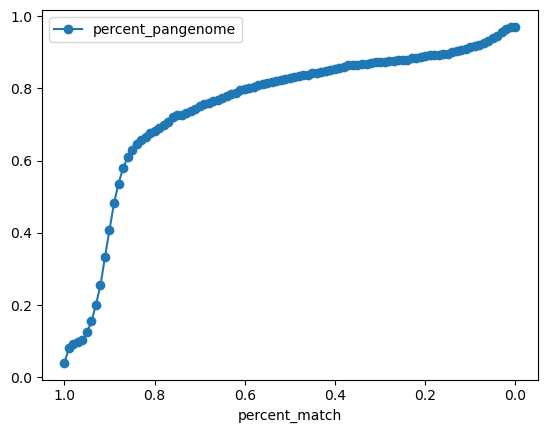

In [23]:
# would need to create a sliding window of 1-100, then just get the raw number of orfs that fall into that category (loop?)
percent_match = []
match_range = np.append(np.arange(1,0,-.01), np.array(0.0))
for i in match_range:
    percent_match.append((df.query('orf_not_s288c')[cols].max(axis=1) >= i).sum())

# looks like there are 374 genes missing from the 16 strains that are in the pangenome

percent_pangenome = []
for i in percent_match:
    percent_pangenome.append(i/1767)

plot_df = pd.DataFrame.from_dict({'percent_match':match_range,'percent_pangenome':percent_pangenome})

ax = plot_df.plot(x='percent_match', y='percent_pangenome', linestyle='-', marker='o')
ax.invert_xaxis()

In [24]:
plot_df

,percent_match,percent_pangenome
0,1.00,0.040181
1,0.99,0.079796
2,0.98,0.092247
3,0.97,0.098472
4,0.96,0.103565
...,...,...
96,0.04,0.945105
97,0.03,0.956989
98,0.02,0.963780
99,0.01,0.969440


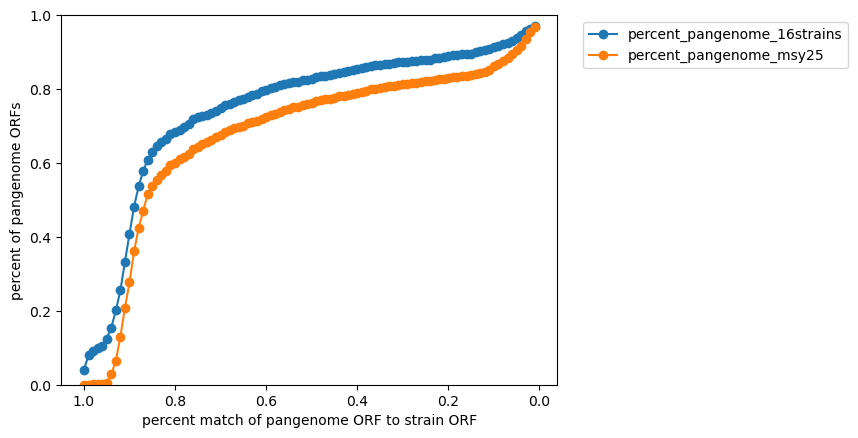

In [8]:
percent_match_16strains = []
for i in np.arange(1,0,-.01):
    percent_match_16strains.append((df.query('orf_not_s288c')[cols].max(axis=1) >= i).sum())
    
percent_pangenome_16strains = []
for i in percent_match_16strains:
    percent_pangenome_16strains.append(i/1767)

percent_match_msy25 = []
for i in np.arange(1,0,-.01):
    percent_match_msy25.append((df.query('orf_not_s288c')['MSY25'] >= i).sum())
    
percent_pangenome_msy25 = []
for i in percent_match_msy25:
    percent_pangenome_msy25.append(i/1767)
    
plot_df = pd.DataFrame.from_dict({'percent_match':np.arange(1,0,-.01),'percent_pangenome_16strains':percent_pangenome_16strains, 'percent_pangenome_msy25':percent_pangenome_msy25})
ax = plot_df.plot(x='percent_match', y=['percent_pangenome_16strains','percent_pangenome_msy25'], linestyle='-', marker='o', ylabel='percent of pangenome ORFs', xlabel='percent match of pangenome ORF to strain ORF')
ax.invert_xaxis()
ax.set_ylim(0,1)
ax.legend(bbox_to_anchor=(1.6, 1.0))

In [9]:
plot_df

,percent_match,percent_pangenome_16strains,percent_pangenome_msy25
0,1.00,0.040181,0.000000
1,0.99,0.079796,0.000000
2,0.98,0.092247,0.001698
3,0.97,0.098472,0.002264
4,0.96,0.103565,0.002830
...,...,...,...
95,0.05,0.938314,0.904358
96,0.04,0.945105,0.917374
97,0.03,0.956989,0.934352
98,0.02,0.963780,0.953028


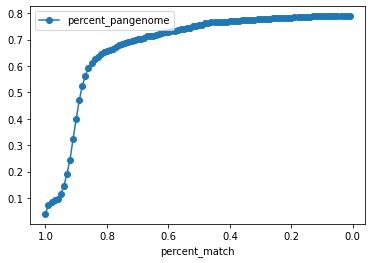

In [37]:
# would need to create a sliding window of 1-100, then just get the raw number of orfs that fall into that category (loop?)
percent_match = []
for i in np.arange(1,0,-.01):
    percent_match.append((df.query('orf_not_s288c')[cols].max(axis=1) >= i).sum())

# looks like there are 374 genes missing from the 16 strains that are in the pangenome

percent_pangenome = []
for i in percent_match:
    percent_pangenome.append(i/1767)

plot_df = pd.DataFrame.from_dict({'percent_match':np.arange(1,0,-.01),'percent_pangenome':percent_pangenome})

ax = plot_df.plot(x='percent_match', y='percent_pangenome', linestyle='-', marker='o')
ax.invert_xaxis()

In [48]:
(df.query('orf_not_s288c')['MSY25'] >= .9).sum()

488

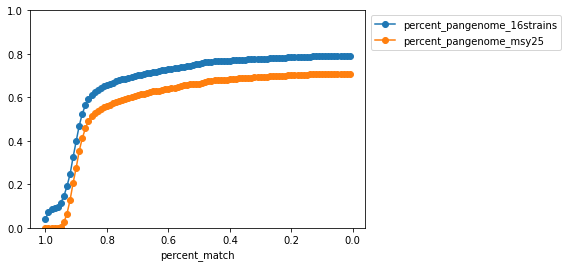

In [69]:
percent_match_16strains = []
for i in np.arange(1,0,-.01):
    percent_match_16strains.append((df.query('orf_not_s288c')[cols].max(axis=1) >= i).sum())
    
percent_pangenome_16strains = []
for i in percent_match_16strains:
    percent_pangenome_16strains.append(i/1767)

percent_match_msy25 = []
for i in np.arange(1,0,-.01):
    percent_match_msy25.append((df.query('orf_not_s288c')['MSY25'] >= i).sum())
    
percent_pangenome_msy25 = []
for i in percent_match_msy25:
    percent_pangenome_msy25.append(i/1767)
    
plot_df = pd.DataFrame.from_dict({'percent_match':np.arange(1,0,-.01),'percent_pangenome_16strains':percent_pangenome_16strains, 'percent_pangenome_msy25':percent_pangenome_msy25})
ax = plot_df.plot(x='percent_match', y=['percent_pangenome_16strains','percent_pangenome_msy25'], linestyle='-', marker='o')
ax.invert_xaxis()
ax.set_ylim(0,1)
ax.legend(bbox_to_anchor=(1.6, 1.0))